In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("preprocessed data.xlsx")

In [3]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade
0,0,2,1,60,3
1,0,1,1,55,2
2,0,1,1,33,3
3,0,1,1,67,2
4,0,1,1,47,2
...,...,...,...,...,...
229,1,2,2,55,2
230,1,3,2,45,2
231,1,3,2,37,3
232,1,3,2,58,2


In [4]:
from pycaret.anomaly import *
#intialize the setup
exp_ano = setup(df)


Setup Succesfully Completed!


,Description,Value
0,session_id,364
1,Original Data,"(234, 5)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(234, 13)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [5]:
knn = create_model('knn')

In [6]:
knn_df = assign_model(knn)
knn_df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
0,0,2,1,60,3,0,1.414214
1,0,1,1,55,2,0,2.000000
2,0,1,1,33,3,0,2.449490
3,0,1,1,67,2,0,2.236068
4,0,1,1,47,2,0,1.732051
...,...,...,...,...,...,...,...
229,1,2,2,55,2,0,2.236068
230,1,3,2,45,2,0,2.236068
231,1,3,2,37,3,0,2.236068
232,1,3,2,58,2,0,2.449490


In [7]:
plot_model(knn)

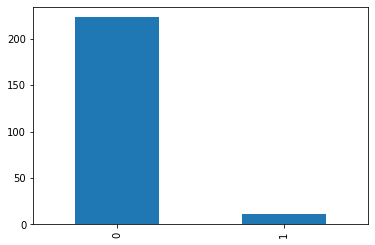

In [8]:
knn_df['Label'].value_counts().plot.bar()

In [9]:
knn_df['Label'].value_counts()

0    223
1     11
Name: Label, dtype: int64

In [10]:
df = knn_df.loc[knn_df['Label'] == 0] 

In [11]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
0,0,2,1,60,3,0,1.414214
1,0,1,1,55,2,0,2.000000
2,0,1,1,33,3,0,2.449490
3,0,1,1,67,2,0,2.236068
4,0,1,1,47,2,0,1.732051
...,...,...,...,...,...,...,...
229,1,2,2,55,2,0,2.236068
230,1,3,2,45,2,0,2.236068
231,1,3,2,37,3,0,2.236068
232,1,3,2,58,2,0,2.449490


In [12]:
raw = knn_df.loc[knn_df['Label'] == 1] 

In [13]:
raw

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Label,Score
7,0,1,1,26,2,1,2.828427
25,0,2,0,30,2,1,2.828427
71,0,2,0,25,3,1,3.316625
76,0,1,1,72,2,1,4.242641
117,0,2,1,29,3,1,3.000000
147,0,2,1,25,3,1,3.000000
149,0,2,1,28,3,1,2.828427
171,0,2,2,30,2,1,2.828427
174,0,3,1,70,3,1,3.162278
190,0,2,3,73,3,1,5.196152


In [14]:
df = df.drop(["Label"],axis=1)

In [15]:
df


,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Score
0,0,2,1,60,3,1.414214
1,0,1,1,55,2,2.000000
2,0,1,1,33,3,2.449490
3,0,1,1,67,2,2.236068
4,0,1,1,47,2,1.732051
...,...,...,...,...,...,...
229,1,2,2,55,2,2.236068
230,1,3,2,45,2,2.236068
231,1,3,2,37,3,2.236068
232,1,3,2,58,2,2.449490


In [16]:
columns = df.columns


0    223
1     11
Name: Label, dtype: int64

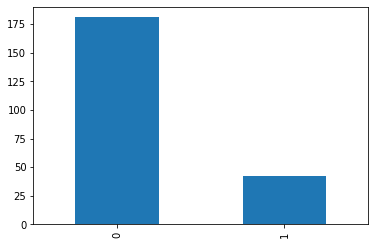

In [17]:
df['target'].value_counts().plot.bar()
knn_df['Label'].value_counts()


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_res = df.iloc[:,1:].values
y_res = df.iloc[:,0].values

In [20]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

Using TensorFlow backend.


In [21]:
os = SMOTETomek()
X_res,y_res = os.fit_sample(X_res,y_res)

In [22]:
X_res.shape

(348, 5)

In [23]:
y_res.shape

(348,)

In [24]:
x = pd.DataFrame(X_res)
y = pd.DataFrame(y_res)

In [25]:
df = pd.concat([y,x],axis=1)

In [26]:
df

,0,0,1,2,3,4
0,0,2.000000,1.000000,60.000000,3.000000,1.414214
1,0,1.000000,1.000000,55.000000,2.000000,2.000000
2,0,1.000000,1.000000,33.000000,3.000000,2.449490
3,0,1.000000,1.000000,47.000000,2.000000,1.732051
4,0,1.000000,1.000000,40.000000,3.000000,2.000000
...,...,...,...,...,...,...
343,1,2.000000,0.587834,66.824331,3.000000,2.324033
344,1,1.342889,0.828556,41.342889,3.000000,2.195595
345,1,2.000000,0.000000,62.000000,2.136486,2.167277
346,1,1.000000,1.000000,52.000000,2.000000,2.236068


In [27]:
df.columns = columns

In [28]:
df

,target,tumor size,node status of the tumor,Age of the patient,tumor grade,Score
0,0,2.000000,1.000000,60.000000,3.000000,1.414214
1,0,1.000000,1.000000,55.000000,2.000000,2.000000
2,0,1.000000,1.000000,33.000000,3.000000,2.449490
3,0,1.000000,1.000000,47.000000,2.000000,1.732051
4,0,1.000000,1.000000,40.000000,3.000000,2.000000
...,...,...,...,...,...,...
343,1,2.000000,0.587834,66.824331,3.000000,2.324033
344,1,1.342889,0.828556,41.342889,3.000000,2.195595
345,1,2.000000,0.000000,62.000000,2.136486,2.167277
346,1,1.000000,1.000000,52.000000,2.000000,2.236068


In [29]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'target')
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.8927,0.9528,0.85,0.9338,0.8856,0.7854
1,CatBoost Classifier,0.8927,0.9649,0.9167,0.8758,0.8949,0.7853
2,Ada Boost Classifier,0.8887,0.9573,0.9006,0.8843,0.8896,0.7773
3,Extreme Gradient Boosting,0.8847,0.9632,0.909,0.8686,0.8876,0.7694
4,Decision Tree Classifier,0.8845,0.8839,0.9083,0.8685,0.8868,0.7691
5,Extra Trees Classifier,0.8803,0.9551,0.9,0.8682,0.8821,0.7607
6,Light Gradient Boosting Machine,0.8763,0.9512,0.8756,0.8832,0.8753,0.7525
7,Gradient Boosting Classifier,0.872,0.9481,0.8917,0.8628,0.8743,0.7439
8,Linear Discriminant Analysis,0.8313,0.8739,0.8513,0.8246,0.8346,0.6631
9,Ridge Classifier,0.823,0,0.8346,0.8229,0.8248,0.6464


In [30]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'target')
# tuning LightGBM Model
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9200,0.9551,1.0000,0.8667,0.9286,0.8387
1,0.9200,0.9679,1.0000,0.8667,0.9286,0.8387
2,0.8400,0.8782,0.8333,0.8333,0.8333,0.6795
3,0.8750,0.9375,0.8333,0.9091,0.8696,0.7500
4,0.9167,0.9931,0.9167,0.9167,0.9167,0.8333
5,0.9167,0.9236,0.8333,1.0000,0.9091,0.8333
6,0.8333,0.8819,0.6667,1.0000,0.8000,0.6667
7,0.8333,0.9583,0.9167,0.7857,0.8462,0.6667
8,0.8333,0.8889,0.7500,0.9000,0.8182,0.6667
9,0.8750,0.9375,0.9167,0.8462,0.8800,0.7500


In [31]:
tuned_xgboost

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.44, max_delta_step=0, max_depth=60,
              min_child_weight=3, missing=None, n_estimators=600, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=976,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [32]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'target')
# tuning LightGBM Model
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8400,0.9808,0.7692,0.9091,0.8333,0.6815
1,0.8800,0.9551,0.9231,0.8571,0.8889,0.7588
2,0.8800,0.9551,0.9167,0.8462,0.8800,0.7604
3,0.9583,0.9861,1.0000,0.9231,0.9600,0.9167
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.9514,0.8333,1.0000,0.9091,0.8333
6,0.9167,0.9722,0.9167,0.9167,0.9167,0.8333
7,0.8750,0.8958,0.9167,0.8462,0.8800,0.7500
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8750,0.9375,0.8333,0.9091,0.8696,0.7500


In [33]:
X_res = df.iloc[:,1:].values
y_res = df.iloc[:,0].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [36]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=1575,
                       verbose=0, warm_start=False)

In [37]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9142857142857143
[[39  2]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.93      0.86      0.89        29

    accuracy                           0.91        70
   macro avg       0.92      0.91      0.91        70
weighted avg       0.91      0.91      0.91        70



In [38]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.68, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3824,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=0)

In [39]:
xgb_model.fit(X_train,y_train)


y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9142857142857143
[[39  2]
 [ 4 25]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.93      0.86      0.89        29

    accuracy                           0.91        70
   macro avg       0.92      0.91      0.91        70
weighted avg       0.91      0.91      0.91        70

